In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
# from labellines import labelLine, labelLines
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset as NetCDFFile 
import matplotlib
# from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
import cartopy
from cartopy.mpl.geoaxes import GeoAxes

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
import geopandas as gpd
# import pygeos
# Import modules
import xarray as xr
import matplotlib.ticker as mticker
import datetime
# import matplotlib.ticker as ticker

from matplotlib.dates import (AutoDateLocator, YearLocator, MonthLocator,
                              DayLocator, WeekdayLocator, HourLocator,
                              MinuteLocator, SecondLocator, MicrosecondLocator,
                              RRuleLocator, rrulewrapper, MONTHLY,
                              MO, TU, WE, TH, FR, SA, SU, DateFormatter,
                              AutoDateFormatter, ConciseDateFormatter)

/Users/weitao/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Read Seasonal GEMS

In [2]:
gems = pd.read_pickle('/Users/weitao/Downloads/Forests/GEMS_Seasonal_Pickle')

gems

,index,lat,lon,HCHO_column,year,season,hour,time,timezone
0,35908,-5.55,130.85,7.169437,2021,Spring,0,2021-01-01 00:45:00,9
1,36662,-5.45,126.25,6.181746,2021,Spring,0,2021-01-01 00:45:00,8
2,36663,-5.45,126.35,7.101030,2021,Spring,0,2021-01-01 00:45:00,8
3,36664,-5.45,126.45,5.757687,2021,Spring,0,2021-01-01 00:45:00,8
4,36665,-5.45,126.55,6.489203,2021,Spring,0,2021-01-01 00:45:00,8
...,...,...,...,...,...,...,...,...,...
14704700,456321,47.05,92.15,0.565132,2022,Winter,6,2022-04-01 06:45:00,6
14704701,456322,47.05,92.25,0.142487,2022,Winter,6,2022-04-01 06:45:00,6
14704702,456324,47.05,92.45,1.588609,2022,Winter,6,2022-04-01 06:45:00,6
14704703,456325,47.05,92.55,1.249561,2022,Winter,6,2022-04-01 06:45:00,6


# Read ERA5

In [3]:
era5 = pd.read_pickle('/Users/weitao/Downloads/Forests/20231024_ERA5_monthly')
era5['month'] = era5['time'].dt.month
era5['year'] = era5['time'].dt.year
era5['celsius'] = era5['t2m'] - 273.15
era5

,time,latitude,longitude,t2m,tp,ssr,expver,month,year,celsius
136352,2021-01-02 00:00:00,44.900002,90.099998,260.434906,0.000144,5930435.0,1,1,2021,-12.715094
136353,2021-01-02 00:00:00,44.900002,90.199997,260.763794,0.000146,6001040.5,1,1,2021,-12.386206
136354,2021-01-02 00:00:00,44.900002,90.300003,260.908081,0.000152,6029885.5,1,1,2021,-12.241919
136355,2021-01-02 00:00:00,44.900002,90.400002,260.737427,0.000164,6023858.5,1,1,2021,-12.412573
136356,2021-01-02 00:00:00,44.900002,90.500000,260.466827,0.000168,6059161.0,1,1,2021,-12.683173
...,...,...,...,...,...,...,...,...,...,...
335499706,2023-07-01 23:00:00,-9.900000,124.300003,292.851715,0.001509,13544640.0,1,7,2023,19.701715
335499707,2023-07-01 23:00:00,-9.900000,124.400002,292.597778,0.002955,13397402.0,1,7,2023,19.447778
335499708,2023-07-01 23:00:00,-9.900000,124.500000,292.453461,0.004434,13245858.0,1,7,2023,19.303461
335499709,2023-07-01 23:00:00,-9.900000,124.599998,292.736542,0.005694,13065900.0,1,7,2023,19.586542


In [4]:
era5 = era5[era5['year'].isin([2021,2022])]
era5

,time,latitude,longitude,t2m,tp,ssr,expver,month,year,celsius
136352,2021-01-02 00:00:00,44.900002,90.099998,260.434906,0.000144,5930435.0,1,1,2021,-12.715094
136353,2021-01-02 00:00:00,44.900002,90.199997,260.763794,0.000146,6001040.5,1,1,2021,-12.386206
136354,2021-01-02 00:00:00,44.900002,90.300003,260.908081,0.000152,6029885.5,1,1,2021,-12.241919
136355,2021-01-02 00:00:00,44.900002,90.400002,260.737427,0.000164,6023858.5,1,1,2021,-12.412573
136356,2021-01-02 00:00:00,44.900002,90.500000,260.466827,0.000168,6059161.0,1,1,2021,-12.683173
...,...,...,...,...,...,...,...,...,...,...
259721101,2022-12-01 23:00:00,-9.900000,124.300003,296.546997,0.004746,16978912.0,1,12,2022,23.396997
259721102,2022-12-01 23:00:00,-9.900000,124.400002,296.466522,0.004696,16986230.0,1,12,2022,23.316522
259721103,2022-12-01 23:00:00,-9.900000,124.500000,296.374939,0.004528,16968578.0,1,12,2022,23.224939
259721104,2022-12-01 23:00:00,-9.900000,124.599998,296.744049,0.004280,17154134.0,1,12,2022,23.594049


# Read CAMS Biogenic emissions

In [6]:
yr = '2021'
cams = xr.open_dataset('/Users/weitao/Downloads/Forests/CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_'+yr+'.nc', engine="netcdf4").to_dataframe().reset_index()
yr = '2022'
cams2 = xr.open_dataset('/Users/weitao/Downloads/Forests/CAMS-GLOB-BIO_Glb_0.25x0.25_bio_isoprene_v3.1_monthly_'+yr+'.nc', engine="netcdf4").to_dataframe().reset_index()
cams = pd.concat([cams,cams2])
cams = cams[cams['emiss_bio']>0]
cams['month'] = cams['time'].dt.month
cams['year'] = cams['time'].dt.year
cams['emiss_bio'] = cams['emiss_bio']*1e3 # g m-2 s-1
cams

,time,lat,lon,crs,gridcell_area,emiss_bio_hourly,emiss_bio,month,year
199167,2021-01-01,-55.50,-68.25,-2147483647,9.969210e+36,1.085354e-05,1.085354e-02,1,2021
200602,2021-01-01,-55.25,-69.50,-2147483647,9.969210e+36,4.738381e-06,4.738382e-03,1,2021
200603,2021-01-01,-55.25,-69.25,-2147483647,9.969210e+36,4.320506e-08,4.320506e-05,1,2021
200604,2021-01-01,-55.25,-69.00,-2147483647,9.969210e+36,1.105272e-06,1.105272e-03,1,2021
200606,2021-01-01,-55.25,-68.50,-2147483647,9.969210e+36,1.108898e-05,1.108898e-02,1,2021
...,...,...,...,...,...,...,...,...,...
12346055,2022-12-01,73.25,53.75,-2147483647,9.969210e+36,6.067636e-14,6.067635e-11,12,2022
12346056,2022-12-01,73.25,54.00,-2147483647,9.969210e+36,4.133104e-14,4.133104e-11,12,2022
12346058,2022-12-01,73.25,54.50,-2147483647,9.969210e+36,7.633602e-15,7.633602e-12,12,2022
12348935,2022-12-01,73.75,53.75,-2147483647,9.969210e+36,1.252466e-12,1.252466e-09,12,2022


# read monthly GEMS sampled to CAMS

In [7]:
lisGEMSM = []
for path in Path('/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/').rglob('*.nc'):
    lisGEMSM.append(str(path))
lisGEMSM

['/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2022030245_025_P15.nc',
 '/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2023060345_025_P15.nc',
 '/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2022050445_025_P15.nc',
 '/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2022100445_025_P15.nc',
 '/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2022030545_025_P15.nc',
 '/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2022050345_025_P15.nc',
 '/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2022100345_025_P15.nc',
 '/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2023060445_025_P15.nc',
 '/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2021110145_025_P15.nc',
 '/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2021040145_025_P15.nc',
 '/Users/weitao/Downloads/Forests/grid_monthly_CAMS_B25/GEMS_HCHO_2023080245_025_P15.nc',
 '/Users/w

In [8]:
df = pd.DataFrame(columns = ['lat','lon','HCHO_column'])

for i in lisGEMSM:
    dfT = xr.open_dataset(i,engine='netcdf4').to_dataframe().reset_index().dropna()
    dfT['month']=int(str(i)[-17:-15])
    dfT['year']=int(str(i)[-21:-17])
    dfT['hour']=int(str(i)[-15:-13])
                    
    df = pd.concat([df,dfT])
df['year'] = df['year'].astype(int)
df['hour'] = df['hour'].astype(int)
df['month'] = df['month'].astype(int)
df

,lat,lon,HCHO_column,month,year,hour
5886,-5.50,91.50,5.187640,3,2022,2
5887,-5.50,91.75,4.794158,3,2022,2
5888,-5.50,92.00,4.735064,3,2022,2
5889,-5.50,92.25,5.069019,3,2022,2
5890,-5.50,92.50,5.162107,3,2022,2
...,...,...,...,...,...,...
72491,46.50,102.75,1.133199,10,2021,2
72492,46.50,103.00,0.629389,10,2021,2
72493,46.50,103.25,-2.118789,10,2021,2
72795,46.75,98.75,0.675741,10,2021,2


In [9]:
df = df[df['year'].isin([2021,2022])]
df

,lat,lon,HCHO_column,month,year,hour
5886,-5.50,91.50,5.187640,3,2022,2
5887,-5.50,91.75,4.794158,3,2022,2
5888,-5.50,92.00,4.735064,3,2022,2
5889,-5.50,92.25,5.069019,3,2022,2
5890,-5.50,92.50,5.162107,3,2022,2
...,...,...,...,...,...,...
72491,46.50,102.75,1.133199,10,2021,2
72492,46.50,103.00,0.629389,10,2021,2
72493,46.50,103.25,-2.118789,10,2021,2
72795,46.75,98.75,0.675741,10,2021,2


In [10]:
cams = cams[['lat','lon','month','year','emiss_bio']].set_index(['lat','lon','month','year'])
df2 = df.join(cams,on=['lat','lon','month','year'])
df2=df2.dropna()
df2=df2[df2['emiss_bio']>0]
df2

,lat,lon,HCHO_column,month,year,hour,emiss_bio
5937,-5.50,104.25,8.061073,3,2022,2,0.737615
5938,-5.50,104.50,8.160925,3,2022,2,0.472810
5939,-5.50,104.75,8.339818,3,2022,2,1.131962
5940,-5.50,105.00,8.512846,3,2022,2,0.146800
5942,-5.50,105.50,8.750162,3,2022,2,0.702586
...,...,...,...,...,...,...,...
72490,46.50,102.50,1.376698,10,2021,2,0.000808
72491,46.50,102.75,1.133199,10,2021,2,0.000648
72492,46.50,103.00,0.629389,10,2021,2,0.000605
72493,46.50,103.25,-2.118789,10,2021,2,0.000390


# Plot

In [11]:
HCHOColor = 'black'
def plotMonthly(ax, count):
    sns.lineplot(data=cams_2, x="month", y="HCHO_column", ax=ax, color=HCHOColor,errorbar=('sd',0.5))

    ax.set_xlabel("", color="black")
    
    ax.tick_params(axis='y', colors=HCHOColor, direction = 'in')
    ax.tick_params(axis='x', direction = 'in')
    ax.set(ylim=(0, 10))
    ax.get_yaxis().get_offset_text().set_visible(False)

    ax.xaxis.set_major_locator(mticker.FixedLocator(list(range(1,13))))
    
    ###########################################################################################
    axX = ax.twinx()
    sns.lineplot(data=cams_2, x="month", y="emiss_bio", ax=axX, color="forestgreen",errorbar=('sd',0.5))

    axX.yaxis.tick_right()
    axX.set_ylabel('', color="forestgreen")       
    axX.xaxis.set_label_position('top') 
    axX.yaxis.set_label_position('right') 
    axX.set(ylim=(0, 2.1))
    axX.yaxis.set_major_locator(mticker.FixedLocator([1,2]))
    axX.tick_params(axis='y', colors="forestgreen", direction = 'in',pad=-13)
    
    axX.get_yaxis().get_offset_text().set_visible(False)

    ###########################################################################################
    colora = 'red'
    axY = ax.twinx()
    

    sns.lineplot(data=era5_2, x="month", y="celsius", ax=axY, color=colora,errorbar=('sd',0.5))

    axY.yaxis.tick_right()
    axY.set_xlabel('', color=colora) 
    axY.set_ylabel('', color=colora)       
    axY.xaxis.set_label_position('top') 
    axY.yaxis.set_label_position('right') 
    axY.tick_params(axis='x', colors=colora, direction = 'in')
    
    
    axY.set(ylim=(-10, 30))
    axY.yaxis.set_major_locator(mticker.FixedLocator([-10, 0, 10,20,30]))
    
    if (count==1 or count==2):
        axY.tick_params(axis='y', colors=colora, labelright=False, labelleft=False, direction = 'in')
        axX.tick_params(axis='y', colors="forestgreen", labelright=False, labelleft=False, direction = 'in')
        ax.tick_params(axis='y', colors=HCHOColor, labelright=False, labelleft=False, direction = 'in')
    elif (count==0):
        axY.tick_params(axis='y', colors=colora, labelright=False, direction = 'in')
        axX.tick_params(axis='y', colors="forestgreen", labelright=False, direction = 'in')
        ax.legend(labels=["HCHO (VCD)"], frameon = False, loc='lower left', bbox_to_anchor=(0.02, 0.03),fontsize=12)
        axX.legend(labels=["Isoprene (g m$^{-2}$ s$^{-1}$)"], frameon = False, loc='lower left', bbox_to_anchor=(0.02, 0.11),fontsize=12)
        axY.legend(labels=["Temperature (Celsius)"], frameon = False, loc='lower left', bbox_to_anchor=(0.02, 0.19),fontsize=12)
    else:
        axY.tick_params(axis='y', colors=colora,  labelleft=False)
        axX.tick_params(axis='y', colors="forestgreen",  labelleft=False, direction = 'in')
        ax.tick_params(axis='y', colors=HCHOColor, labelright=False, labelleft=False, direction = 'in')

    plt.rcParams['figure.dpi']=600

In [12]:
gems['season'] = ['Fall' if a=='Autumn' else a  for a in gems['season']]

/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_27583/1950260804.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gems_2['Local time'] = local
/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_27583/1950260804.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gems_2['Local time'] = gems_2['Local time'].dt.hour+1
/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_27583/1950260804.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

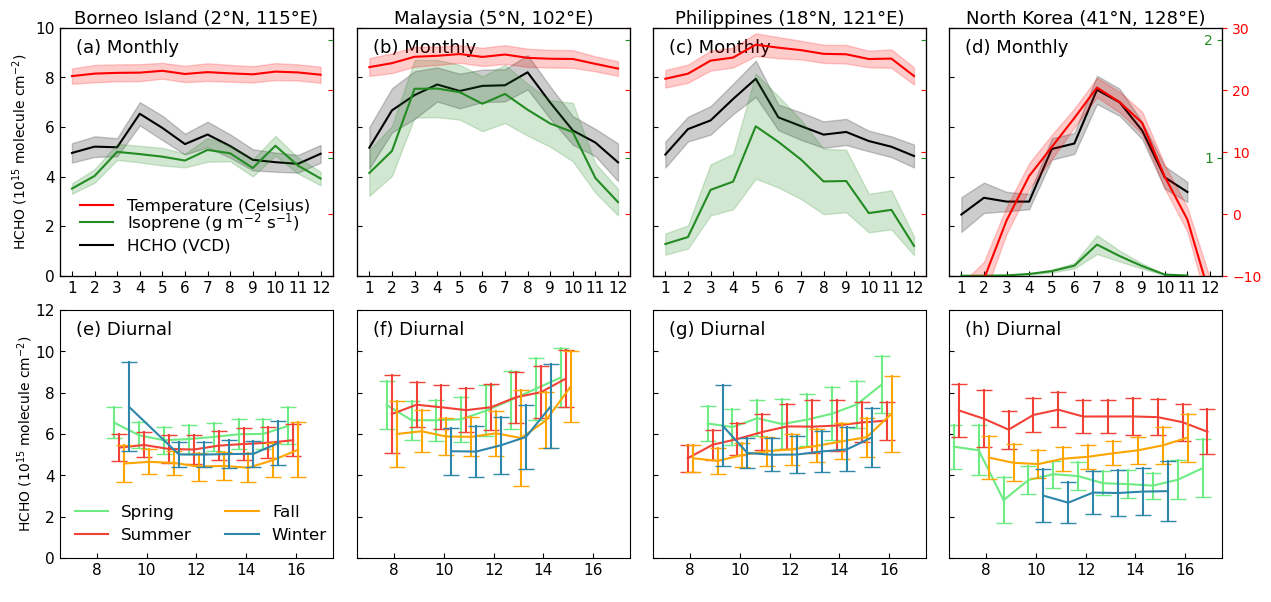

In [13]:
cm = 1/2.54  # centimeters in inches
fsize = 13
plt.rcParams['figure.dpi']=600
plt.style.use('default')
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()

fig = plt.figure(layout="constrained", figsize=(32*cm,15*cm)) # Width, height
offs = [-0.3,-0.1,0.1,0.3]
gs = GridSpec(2, 4, figure=fig)

# cams21 = cams.sel(time='2022-03-01')
colorsDic = {'Spring':'#6EEB83','Summer':'#F24236','Fall':'#FFA500','Winter':'#2e86ab'}



# Monthly
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
# Diurnal
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])


axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
colors = ['#5296c5', '#ff8d2a', '#60b760', '#e05c5d', '#ccb6df', '#b9f2f0']
formatter = matplotlib.dates.DateFormatter('%H:%M')

extentLis = [[114, 116, 1, 3],[101, 103,4, 6],[120, 122, 17, 19],[127, 129, 40, 42],]

titles = ['Borneo Island (2\u00B0N, 115\u00B0E)', 'Malaysia (5\u00B0N, 102\u00B0E)','Philippines (18\u00B0N, 121\u00B0E)',
          'North Korea (41\u00B0N, 128\u00B0E)',]
alp = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


def adjustFig(f):
    f.set_xlabel('', labelpad = 0.1,color='white')
    f.set_ylabel('', labelpad = 0.1,color='white')
    f.add_feature(bio, linewidth=1, alpha=1)
    f.add_feature(cfeature.COASTLINE, linewidth=1, alpha=1,color='black')

    for pos in ['right', 'top', 'bottom', 'left']:
        f.spines[pos].set_visible(False) 


for count in range(8):
    count2 = count
    axs[count].set_xlabel(' ', labelpad = 0.1)
    if (count<4):           
        try:
#             df3 = df2
            gems_2 = gems[(gems['lat']>extentLis[count][2])&(gems['lat']<extentLis[count][3])&(gems['lon']>extentLis[count][0])&(gems['lon']<extentLis[count][1])]
            cams_2 = df2[(df2['lat']>extentLis[count][2])&(df2['lat']<extentLis[count][3])&(df2['lon']>extentLis[count][0])&(df2['lon']<extentLis[count][1])]
#             cams_2['emiss_bio'] = cams_2['emiss_bio']*64
            era5_2 = era5[(era5['latitude']>extentLis[count][2])&(era5['latitude']<extentLis[count][3])&(era5['longitude']>extentLis[count][0])&(era5['longitude']<extentLis[count][1])]

            plotMonthly(axs[count],count)
            if (count==0):
                axs[count].set_ylabel("HCHO (10$^{15}$ molecule cm$^{-2}$)", color=HCHOColor)
            else:
                axs[count].set_ylabel("")

            axs[count].set_title(titles[count], pad = 0, fontsize=fsize)
            axs[count].text(0.06,0.9,'('+alp[count]+') Monthly',transform=axs[count].transAxes,size=fsize)

        except:
            print(yr+months[count]+'?')

    else:
        axs[count].tick_params(axis='x', direction = 'in',labelsize=10)
        axs[count].set_xlim(6.5,17.5)
        axs[count].text(0.06,0.9,'('+alp[count]+') Diurnal',transform=axs[count].transAxes,size=fsize)
        
        loca = extentLis[count-4]
        gems_2 = gems[(gems['lat']>loca[2])&(gems['lat']<loca[3])&(gems['lon']>loca[0])&(gems['lon']<loca[1])]
        
        local = []
        for i in range(len(gems_2['lon'])):
            local.append(gems_2.iloc[i]['time']+datetime.timedelta(hours=int(gems_2.iloc[i]['timezone'])))
        gems_2['Local time'] = local


        gems_2['Local time'] = gems_2['Local time'].dt.hour+1

        count2 = 0
        

        for i in ['Spring','Summer','Fall','Winter',]:

            temp = gems_2[gems_2['season']==i]
            temp['Local time'] = temp['Local time'] + offs[count2]
            lg = True if count ==4 else False
            g = sns.lineplot(x='Local time', y='HCHO_column', hue='season', data=temp,legend = lg,ax=axs[count],err_style='bars',errorbar='sd',err_kws={'capsize':6},palette=[colorsDic[i]])

            count2 = count2 + 1

        axs[count].set_ylim(0,12)
        
        axs[count].xaxis.set_major_locator(mticker.FixedLocator(list(range(8,17,2))))
        if (count==4):
            axs[count].set_ylabel("HCHO (10$^{15}$ molecule cm$^{-2}$)", labelpad = 0.1)
            #get handles and labels
            handles, labels = axs[count].get_legend_handles_labels()

            #specify order of items in legend
            order = [0, 1, 2, 3]

            #add legend to plot
            axs[count].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=fsize-1, loc='lower left',frameon=False,ncols=2)
            axs[count].tick_params(axis='y', direction = 'in',labelsize=10)
        else:
            axs[count].set_ylabel(' ', labelpad = 0.1)
            axs[count].tick_params(axis='y', labelright=False, labelleft=False, direction = 'in',labelsize=10)        

    axs[count].tick_params(labelsize=11)     
                
